<center><h1>Mini Project 8</h1></center>
<br>
<center><font size="5">Name - Spandan Patil</font></center>
<br>
<center><font size="4">Breast Cancer Wisconsin (Diagnostic) Data</font></center>

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix)
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from collections import Counter
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [18]:
# Here we are reading the Breast Cancer Wisconsion dataset, and adding our own custom columns names, and dropping the ID column, which is no required.
dataset = pd.read_csv("../data/wdbc.csv", header=None)

cols = ["ID", "Diagnosis"]
for i in range(1, len(dataset.columns)-1):
    cols.append(f"f_{i}")

dataset.columns = cols

dataset = dataset.drop(["ID"], axis=1)
dataset.head()

,Diagnosis,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### (b) Monte-Carlo Simulation

In [19]:
# Here we are splitting the dataset into train and test set and then Normalizing them and also converting the labels into binary form.
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

X_train, y_train = train_set[train_set.columns[1:]], train_set[train_set.columns[0]]
X_test, y_test = test_set[test_set.columns[1:]], test_set[test_set.columns[0]]

scaler = Normalizer()
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

le = LabelEncoder()
y_train_binary = le.fit_transform(y_train) 
y_test_binary = le.transform(y_test) 

#### (i) Supervised Learning

In [20]:
# Here is our Linear SVM model with L-1 penalty.
linearSVM = LinearSVC(penalty='l1', max_iter=100000, random_state=42)

# Here we are choosing the best C value using 5-fold cross validation.
param_grid = {'C': np.logspace(-3, 1, 10)}
linear_clf = GridSearchCV(linearSVM, param_grid, cv=5, scoring='accuracy')

linear_clf.fit(X_train_normal, y_train_binary)
best_model = linear_clf.best_estimator_

# Here we are getting the train and test set predictions
y_train_pred = best_model.predict(X_train_normal)
y_test_pred = best_model.predict(X_test_normal)

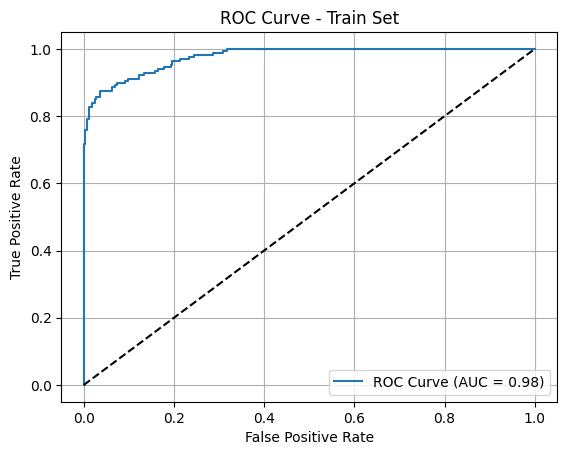

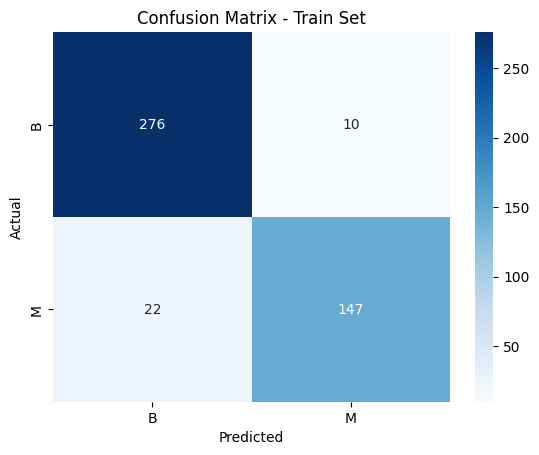

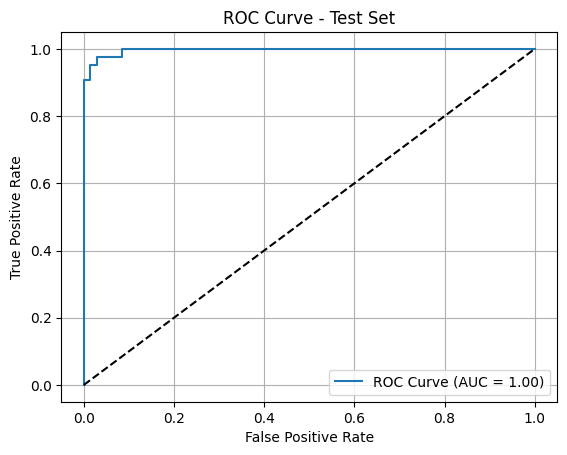

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

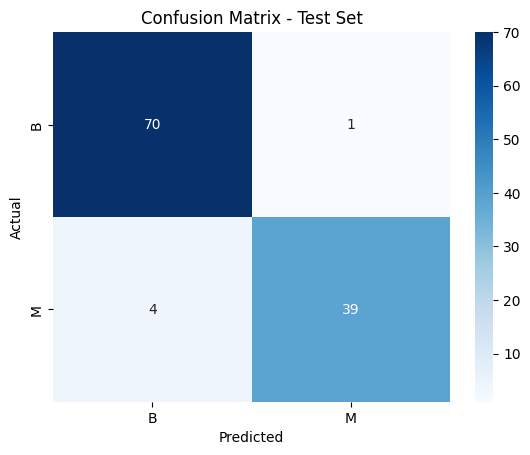

In [21]:
# Here we are getting the raw scores (Distance from the decision boundary) for each train and test samples.
y_train_scores = best_model.decision_function(X_train_normal)
y_test_scores = best_model.decision_function(X_test_normal)

# Here we are calculating the ROC curve and confusion matrix for train and test set.
fpr, tpr, _ = roc_curve(y_train_binary, y_train_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_train_binary, y_train_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_train_binary, y_train_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Set')


fpr, tpr, _ = roc_curve(y_test_binary, y_test_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test_binary, y_test_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_test_binary, y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')

In [22]:
# Here we are performing the Monte-Carlo Simulation with 30 iterations, and getting the train and test -  accuracy, precision, recall, f1 and auc scores.
sl_vals_lst = {
    'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []},
    'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
}

M = 31
for itr in range(1, M):
    # Here is our Linear SVM model with L-1 penalty.
    linearSVM = LinearSVC(penalty='l1', max_iter=1000000, random_state=itr)

    # Here we are choosing the best C value using 5-fold cross validation.
    param_grid = {'C': np.logspace(-3, 1, 10)}
    linear_clf = GridSearchCV(linearSVM, param_grid, cv=5, scoring='f1')
    linear_clf.fit(X_train_normal, y_train_binary)
    best_model = linear_clf.best_estimator_

    # Here we are getting the train and test set predictions
    y_train_pred = best_model.predict(X_train_normal)
    y_test_pred = best_model.predict(X_test_normal)

    # Here we are getting the raw scores (Distance from the decision boundary) for each train and test samples.
    y_train_scores = best_model.decision_function(X_train_normal)
    y_test_scores = best_model.decision_function(X_test_normal)

    # Here we are calculating and storing the accuracy, precison, recall, f1, auc score for train and test set.
    sl_vals_lst["train"]['accuracy'].append(accuracy_score(y_train_binary, y_train_pred))
    sl_vals_lst["train"]['precision'].append(precision_score(y_train_binary, y_train_pred))
    sl_vals_lst["train"]['recall'].append(recall_score(y_train_binary, y_train_pred))
    sl_vals_lst["train"]['f1'].append(f1_score(y_train_binary, y_train_pred))
    sl_vals_lst["train"]['auc'].append(roc_auc_score(y_train_binary, y_train_scores))

    sl_vals_lst["test"]['accuracy'].append(accuracy_score(y_test_binary, y_test_pred))
    sl_vals_lst["test"]['precision'].append(precision_score(y_test_binary, y_test_pred))
    sl_vals_lst["test"]['recall'].append(recall_score(y_test_binary, y_test_pred))
    sl_vals_lst["test"]['f1'].append(f1_score(y_test_binary, y_test_pred))
    sl_vals_lst["test"]['auc'].append(roc_auc_score(y_test_binary, y_test_scores))

In [23]:
# Here we are printing the avg scores with found after Monte-Carlo Simulation.
print("The Avg Scores for the Supervised Learning are:")
print("")
for split in ["train", "test"]:
    print(f"The {split} Accuracy Score is : {np.mean(sl_vals_lst[split]['accuracy'])}")
    print(f"The {split} Precision Score is : {np.mean(sl_vals_lst[split]['precision'])}")
    print(f"The {split} Recall Score is : {np.mean(sl_vals_lst[split]['recall'])}")
    print(f"The {split} F1 Score is : {np.mean(sl_vals_lst[split]['f1'])}")
    print(f"The {split} AUC Score is : {np.mean(sl_vals_lst[split]['auc'])}")
    print("")

The Avg Scores for the Supervised Learning are:

The train Accuracy Score is : 0.9296703296703297
The train Precision Score is : 0.9363057324840763
The train Recall Score is : 0.8698224852071009
The train F1 Score is : 0.9018404907975461
The train AUC Score is : 0.9771120398339335

The test Accuracy Score is : 0.9561403508771927
The test Precision Score is : 0.9750000000000002
The test Recall Score is : 0.9069767441860465
The test F1 Score is : 0.9397590361445786
The test AUC Score is : 0.9967245332459878



#### (ii) Semi-Supervised Learning/ Self-training

In [24]:
# Here we are spliting the train set into half where one half is labeled and other half is  unlabeled. 
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(
    X_train_normal, y_train_binary, test_size=0.5, random_state=42
)

##### (A)

In [25]:
# Here is our Linear SVM model with L-1 penalty.
init_model = LinearSVC(penalty='l1', max_iter=100000, random_state=42)
# Here we are choosing the best C value using 5-fold cross validation.
base_clf = GridSearchCV(init_model, {'C': np.logspace(-3, 1, 10)}, cv=5, scoring='accuracy')
base_clf.fit(X_labeled, y_labeled)
best_model = base_clf.best_estimator_

##### (B)

In [26]:
# Here we are selecting one sample from the unlabelled set which is having the most confidence (max distance from decision boundary) and labelling it according to our model and adding it into the labeled set and removing it from the unlabled set.  We repeat this procedure till there are no samples left in unlabeled set.
while len(X_unlabeled) > 0:
    # Getting the distance of each unlabeled sample from decision boundary.
    dists = np.abs(best_model.decision_function(X_unlabeled))
    # Getting the sample having the max distance.
    max_idx = np.argmax(dists)

    # Getting that samples predicted label.
    new_x = X_unlabeled[max_idx].reshape(1, -1)
    new_y = best_model.predict(new_x)

    # Adding that sample to the to labeled set
    X_labeled = np.vstack([X_labeled, new_x])
    y_labeled = np.append(y_labeled, new_y)

    # Removing that sample from unlabeled set
    X_unlabeled = np.delete(X_unlabeled, max_idx, axis=0)

    # Fitting our model with the updated labelled set.
    best_model.fit(X_labeled, y_labeled)

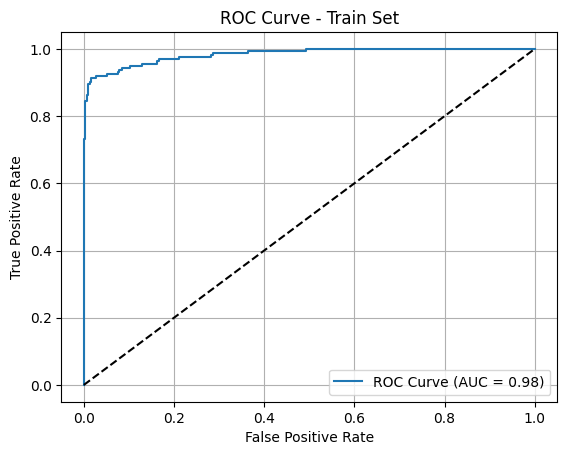

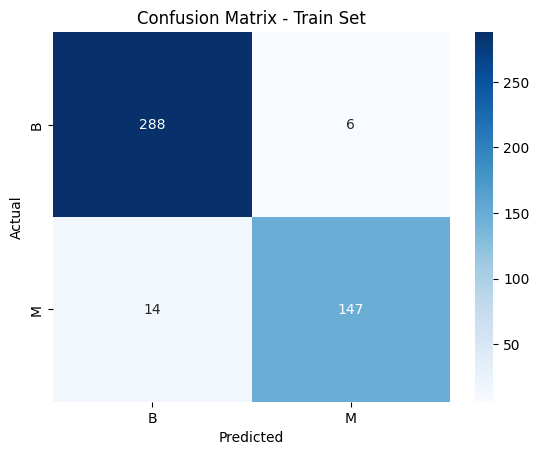

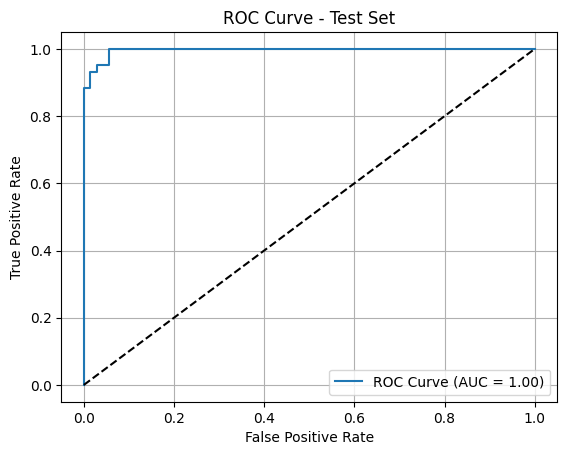

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

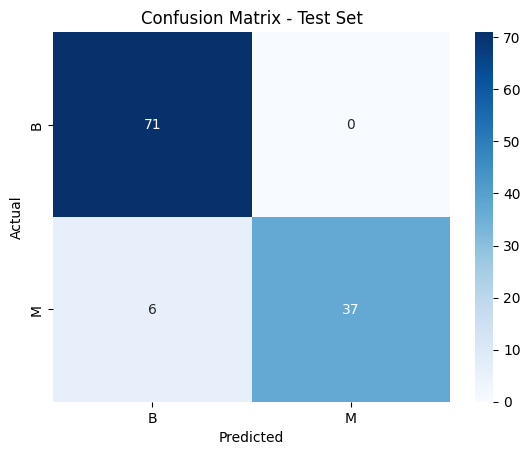

In [27]:
# Here we are getting the train and test set predictions
y_train_pred = best_model.predict(X_labeled)
y_test_pred = best_model.predict(X_test_normal)

# Here we are getting the raw scores (Distance from the decision boundary) for each train and test samples.
y_train_scores = best_model.decision_function(X_labeled)
y_test_scores = best_model.decision_function(X_test_normal)

# Here we are calculating the ROC curve and confusion matrix for train and test set.
fpr, tpr, _ = roc_curve(y_labeled, y_train_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_labeled, y_train_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_labeled, y_train_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Set')


fpr, tpr, _ = roc_curve(y_test_binary, y_test_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test_binary, y_test_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_test_binary, y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')

In [28]:
# Here we are performing the Monte-Carlo Simulation with 30 iterations, and getting the train and test -  accuracy, precision, recall, f1 and auc scores.
ssl_vals_lst = {
    'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []},
    'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
}

M = 31
for itr in range(1, M):
    # Here we are spliting the train set into half where one half is labeled and other half is  unlabeled.
    X_labeled, X_unlabeled, y_labeled, _ = train_test_split(
    X_train_normal, y_train_binary, test_size=0.5, random_state=itr
    )

    # Here is our Linear SVM model with L-1 penalty.
    base_model = LinearSVC(penalty='l1', max_iter=100000, random_state=itr)
    # Here we are choosing the best C value using 5-fold cross validation.
    base_clf = GridSearchCV(base_model, {'C': np.logspace(-3, 1, 10)}, cv=5, scoring='accuracy')
    base_clf.fit(X_labeled, y_labeled)
    best_model = base_clf.best_estimator_

    # Here we are selecting one sample from the unlabelled set which is having the most confidence (max distance from decision boundary) and labelling it according to our model and adding it into the labeled set and removing it from the unlabled set.  We repeat this procedure till there are no samples left in unlabeled set.
    while len(X_unlabeled) > 0:
        # Getting the distance of each unlabeled sample from decision boundary.
        dists = np.abs(best_model.decision_function(X_unlabeled))
        # Getting the sample having the max distance.
        max_idx = np.argmax(dists)

        # Getting that samples predicted label.
        new_x = X_unlabeled[max_idx].reshape(1, -1)
        new_y = best_model.predict(new_x)

        # Adding that sample to the to labeled set
        X_labeled = np.vstack([X_labeled, new_x])
        y_labeled = np.append(y_labeled, new_y)

        # Removing that sample from unlabeled set
        X_unlabeled = np.delete(X_unlabeled, max_idx, axis=0)

        # Fitting our model with the updated labelled set.
        best_model.fit(X_labeled, y_labeled)

    # Here we are getting the train and test set predictions
    y_train_pred = best_model.predict(X_labeled)
    y_test_pred = best_model.predict(X_test_normal)

    # Here we are getting the raw scores (Distance from the decision boundary) for each train and test samples.
    y_train_scores = best_model.decision_function(X_labeled)
    y_test_scores = best_model.decision_function(X_test_normal)

    # Here we are calculating and storing the accuracy, precison, recall, f1, auc score for train and test set.
    ssl_vals_lst["train"]['accuracy'].append(accuracy_score(y_labeled, y_train_pred))
    ssl_vals_lst["train"]['precision'].append(precision_score(y_labeled, y_train_pred))
    ssl_vals_lst["train"]['recall'].append(recall_score(y_labeled, y_train_pred))
    ssl_vals_lst["train"]['f1'].append(f1_score(y_labeled, y_train_pred))
    ssl_vals_lst["train"]['auc'].append(roc_auc_score(y_labeled, y_train_scores))

    ssl_vals_lst["test"]['accuracy'].append(accuracy_score(y_test_binary, y_test_pred))
    ssl_vals_lst["test"]['precision'].append(precision_score(y_test_binary, y_test_pred))
    ssl_vals_lst["test"]['recall'].append(recall_score(y_test_binary, y_test_pred))
    ssl_vals_lst["test"]['f1'].append(f1_score(y_test_binary, y_test_pred))
    ssl_vals_lst["test"]['auc'].append(roc_auc_score(y_test_binary, y_test_scores))

In [29]:
# Here we are printing the avg scores with found after Monte-Carlo Simulation.
print("The Avg Scores for the Semi-Supervised Learning are:")
print("")
for split in ["train", "test"]:
    print(f"The {split} Accuracy Score is : {np.mean(ssl_vals_lst[split]['accuracy'])}")
    print(f"The {split} Precision Score is : {np.mean(ssl_vals_lst[split]['precision'])}")
    print(f"The {split} Recall Score is : {np.mean(ssl_vals_lst[split]['recall'])}")
    print(f"The {split} F1 Score is : {np.mean(ssl_vals_lst[split]['f1'])}")
    print(f"The {split} AUC Score is : {np.mean(ssl_vals_lst[split]['auc'])}")
    print("")

The Avg Scores for the Semi-Supervised Learning are:

The train Accuracy Score is : 0.9597802197802198
The train Precision Score is : 0.9672646974671545
The train Recall Score is : 0.918056941168963
The train F1 Score is : 0.9418155823022585
The train AUC Score is : 0.985863468271268

The test Accuracy Score is : 0.9470760233918126
The test Precision Score is : 0.976911488470434
The test Recall Score is : 0.8813953488372095
The test F1 Score is : 0.9260727745448906
The test AUC Score is : 0.9946173163009061



#### (iii) Unsupervised Learning

##### (A)

By using the n_init parameter in KMeans, we are avoiding getting trapped in the local minimum, as this will run n times with different initial centroids and keep the best one (lowest inertia)

In [30]:
# Here is our Kmeans model having 2 clusters and choosing from the best of 10 random init states.
kmeans_clf = KMeans(n_clusters=2, init='random', n_init=10, random_state=42)
kmeans_clf.fit(X_train_normal)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

##### (B) & (C)

In [31]:
# Here we are getting the centroid for our 2 clusters.
centroids = kmeans_clf.cluster_centers_

# Here we are computing distances of all train samples to both centroids
train_dists = pairwise_distances(X_train_normal, centroids)

# Here we are finding indices of the 30 closest points to each centroid.
clr_0_idxs = np.argsort(train_dists[:, 0])[:30]
clr_1_idxs = np.argsort(train_dists[:, 1])[:30]

# Here we are getting the true labels of those closest points
lbls_0 = y_train_binary[clr_0_idxs]
lbls_1 = y_train_binary[clr_1_idxs]

# Here we are taking majority vote, to determine which label does each centroid denotes.
lbl_clr_0 = Counter(lbls_0).most_common(1)[0][0]
lbl_clr_1 = Counter(lbls_1).most_common(1)[0][0]

# Here we are getting the train and test set predictions
clr_train_preds = kmeans_clf.predict(X_train_normal)
clr_test_preds = kmeans_clf.predict(X_test_normal)

# Here we are mapping the cluster labels to true class labels
clr_2_lbl = {0: lbl_clr_0, 1: lbl_clr_1}
y_train_pred = np.vectorize(clr_2_lbl.get)(clr_train_preds)
y_test_pred = np.vectorize(clr_2_lbl.get)(clr_test_preds)

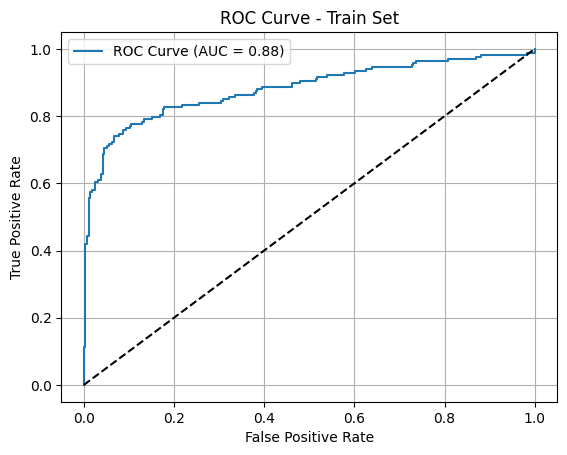

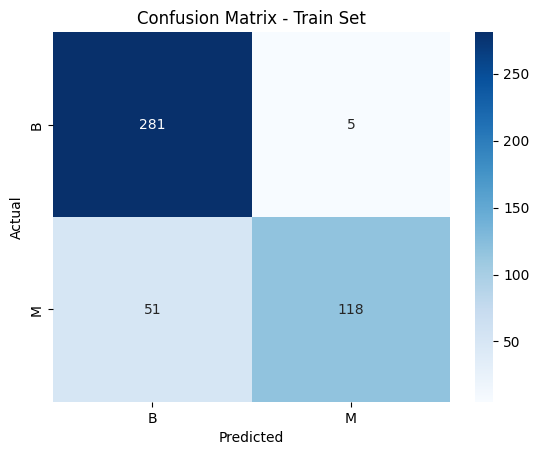

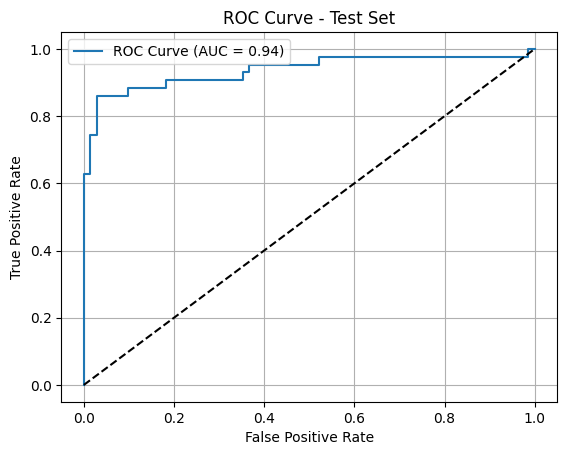

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

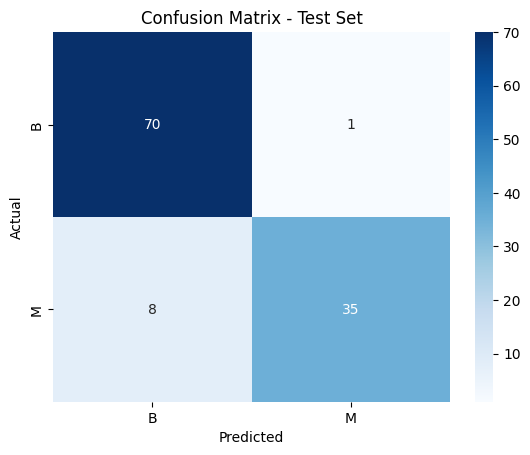

In [32]:
# Here we are computing distances of all test samples to both centroids
test_dists = pairwise_distances(X_test_normal, centroids)

# Here we are getting the raw scores (negative Distance from the centroids) for each train and test samples.
y_train_scores = -train_dists[:, 0]
y_test_scores = -test_dists[:, 0]

# Here we are calculating the ROC curve and confusion matrix for train and test set.
fpr, tpr, _ = roc_curve(y_train_binary, y_train_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_train_binary, y_train_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_train_binary, y_train_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Set')


fpr, tpr, _ = roc_curve(y_test_binary, y_test_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test_binary, y_test_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_test_binary, y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')

In [33]:
# Here we are performing the Monte-Carlo Simulation with 30 iterations, and getting the train and test -  accuracy, precision, recall, f1 and auc scores.
usl_vals_lst = {
    'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []},
    'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
}

M = 31
for itr in range(1, M):
    # Here is our Kmeans model having 2 clusters and choosing from the best of 10 random init states.
    kmeans_clf = KMeans(n_clusters=2, init='random', n_init=10, random_state=itr)
    kmeans_clf.fit(X_train_normal)

    # Here we are getting the centroid for our 2 clusters.
    centroids = kmeans_clf.cluster_centers_

    # Here we are computing distances of all train samples to both centroids
    train_dists = pairwise_distances(X_train_normal, centroids)

    # Here we are finding indices of the 30 closest points to each centroid.
    clr_0_idxs = np.argsort(train_dists[:, 0])[:30]
    clr_1_idxs = np.argsort(train_dists[:, 1])[:30]

    # Here we are getting the true labels of those closest points
    lbls_0 = y_train_binary[clr_0_idxs]
    lbls_1 = y_train_binary[clr_1_idxs]

    # Here we are taking majority vote, to determine which label does each centroid denotes.
    lbl_clr_0 = Counter(lbls_0).most_common(1)[0][0]
    lbl_clr_1 = Counter(lbls_1).most_common(1)[0][0]

    # Here we are getting the train and test set predictions
    clr_train_preds = kmeans_clf.predict(X_train_normal)
    clr_test_preds = kmeans_clf.predict(X_test_normal)

    # Here we are mapping the cluster labels to true class labels
    clr_2_lbl = {0: lbl_clr_0, 1: lbl_clr_1}
    y_train_pred = np.vectorize(clr_2_lbl.get)(clr_train_preds)
    y_test_pred = np.vectorize(clr_2_lbl.get)(clr_test_preds)

    # Here we are computing distances of all test samples to both centroids
    test_dists = pairwise_distances(X_test_normal, centroids)

    # Here we are getting the raw scores (negative Distance from the centroids) for each train and test samples.
    y_train_scores = -train_dists[:, 1]
    y_test_scores = -test_dists[:, 1]

    # Here we are calculating and storing the accuracy, precison, recall, f1, auc score for train and test set.
    usl_vals_lst["train"]['accuracy'].append(accuracy_score(y_train_binary, y_train_pred))
    usl_vals_lst["train"]['precision'].append(precision_score(y_train_binary, y_train_pred))
    usl_vals_lst["train"]['recall'].append(recall_score(y_train_binary, y_train_pred))
    usl_vals_lst["train"]['f1'].append(f1_score(y_train_binary, y_train_pred))
    usl_vals_lst["train"]['auc'].append(roc_auc_score(y_train_binary, y_train_scores))
    
    usl_vals_lst["test"]['accuracy'].append(accuracy_score(y_test_binary, y_test_pred))
    usl_vals_lst["test"]['precision'].append(precision_score(y_test_binary, y_test_pred))
    usl_vals_lst["test"]['recall'].append(recall_score(y_test_binary, y_test_pred))
    usl_vals_lst["test"]['f1'].append(f1_score(y_test_binary, y_test_pred))
    usl_vals_lst["test"]['auc'].append(roc_auc_score(y_test_binary, y_test_scores))

In [34]:
# Here we are printing the avg scores with found after Monte-Carlo Simulation.
print("The Avg Scores for the Un-Supervised Learning are:")
print("")
for split in ["train", "test"]:
    print(f"The {split} Accuracy Score is : {np.mean(usl_vals_lst[split]['accuracy'])}")
    print(f"The {split} Precision Score is : {np.mean(usl_vals_lst[split]['precision'])}")
    print(f"The {split} Recall Score is : {np.mean(usl_vals_lst[split]['recall'])}")
    print(f"The {split} F1 Score is : {np.mean(usl_vals_lst[split]['f1'])}")
    print(f"The {split} AUC Score is : {np.mean(usl_vals_lst[split]['auc'])}")
    print("")

The Avg Scores for the Un-Supervised Learning are:

The train Accuracy Score is : 0.872967032967033
The train Precision Score is : 0.9587448767049654
The train Recall Score is : 0.6875739644970416
The train F1 Score is : 0.8008219178082193
The train AUC Score is : 0.4382663687397415

The test Accuracy Score is : 0.9210526315789476
The test Precision Score is : 0.972222222222222
The test Recall Score is : 0.8139534883720929
The test F1 Score is : 0.8860759493670888
The test AUC Score is : 0.4475925319358008



#### (iv) Spectral Clustering

In [35]:
# Here is our Spectral Clustering model with rbf kernel and using k-means as clustering methods.
spectral_clf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=42)
clr_train_preds = spectral_clf.fit_predict(X_train_normal)

# Here we are taking majority vote, to determine which label does each cluster denotes.
clr_2_lbl = {}
for cltr_id in [0, 1]:
    # Here we are getting indices of all points in the current cluster
    idxs = np.where(clr_train_preds == cltr_id)[0]
    
    # Here Using all the points in the cluster to determine its majority label
    major_lbl = Counter(y_train_binary[idxs]).most_common(1)[0][0]
    clr_2_lbl[cltr_id] = major_lbl

# Here we are mapping the cluster labels to true class labels
y_train_pred = np.vectorize(clr_2_lbl.get)(clr_train_preds)

# Here we are training KNN classifier to predict test labels
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train_normal, y_train_pred)

# Here we are getting the train and test set predictions
y_train_pred = clf.predict(X_train_normal)
y_test_pred = clf.predict(X_test_normal)

# Here we are getting the raw scores (probabilities) for each train and test samples.
y_train_scores = clf.predict_proba(X_train_normal)[:, 1]
y_test_scores = clf.predict_proba(X_test_normal)[:, 1]

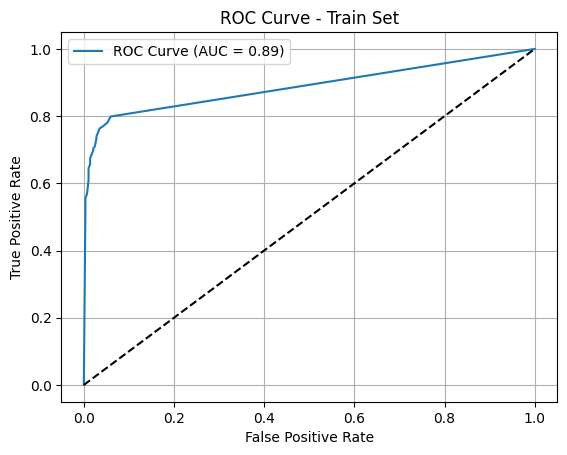

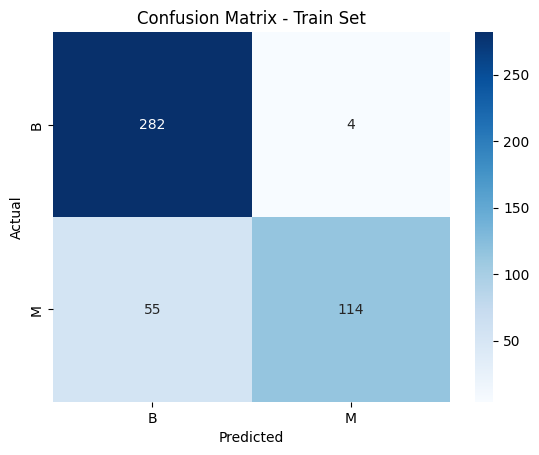

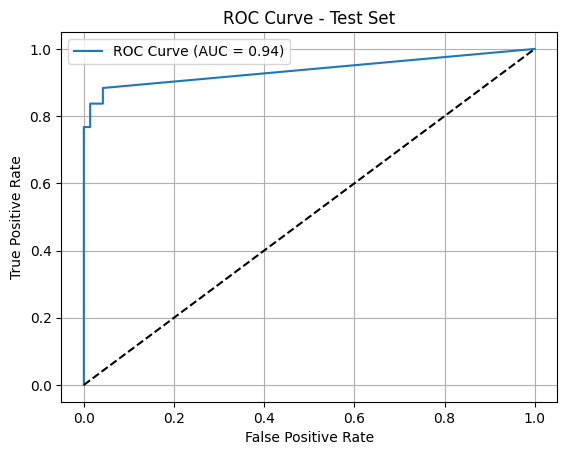

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

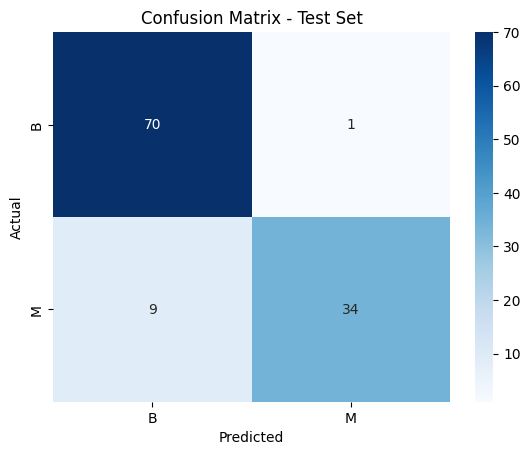

In [36]:
# Here we are calculating the ROC curve and confusion matrix for train and test set.
fpr, tpr, _ = roc_curve(y_train_binary, y_train_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_train_binary, y_train_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_train_binary, y_train_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Set')


fpr, tpr, _ = roc_curve(y_test_binary, y_test_scores)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test_binary, y_test_scores)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(y_test_binary, y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')

In [37]:
# Here we are performing the Monte-Carlo Simulation with 30 iterations, and getting the train and test -  accuracy, precision, recall, f1 and auc scores.
spsl_vals_lst = {
    'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []},
    'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
}

M = 31
for itr in range(1, M):
    # Here is our Spectral Clustering model with rbf kernel and using k-means as clustering methods.
    spectral_clf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=itr)
    clr_train_preds = spectral_clf.fit_predict(X_train_normal)

    # Here we are taking majority vote, to determine which label does each cluster denotes.
    clr_2_lbl = {}
    for cltr_id in [0, 1]:
        # Here we are getting indices of all points in the current cluster
        idxs = np.where(clr_train_preds == cltr_id)[0]
        
        # Here Using all the points in the cluster to determine its majority label
        major_lbl = Counter(y_train_binary[idxs]).most_common(1)[0][0]
        clr_2_lbl[cltr_id] = major_lbl

    # Here we are mapping the cluster labels to true class labels
    y_train_pred = np.vectorize(clr_2_lbl.get)(clr_train_preds)

    # Here we are training KNN classifier to predict test labels
    clf = KNeighborsClassifier(n_neighbors=20)
    clf.fit(X_train_normal, y_train_pred)

    # Here we are getting the train and test set predictions
    y_train_pred = clf.predict(X_train_normal)
    y_test_pred = clf.predict(X_test_normal)

    # Here we are getting the raw scores (probabilities) for each train and test samples.
    y_train_scores = clf.predict_proba(X_train_normal)[:, 1]
    y_test_scores = clf.predict_proba(X_test_normal)[:, 1]

    # Here we are calculating and storing the accuracy, precison, recall, f1, auc score for train and test set.
    spsl_vals_lst["train"]['accuracy'].append(accuracy_score(y_train_binary, y_train_pred))
    spsl_vals_lst["train"]['precision'].append(precision_score(y_train_binary, y_train_pred))
    spsl_vals_lst["train"]['recall'].append(recall_score(y_train_binary, y_train_pred))
    spsl_vals_lst["train"]['f1'].append(f1_score(y_train_binary, y_train_pred))
    spsl_vals_lst["train"]['auc'].append(roc_auc_score(y_train_binary, y_train_scores))

    spsl_vals_lst["test"]['accuracy'].append(accuracy_score(y_test_binary, y_test_pred))
    spsl_vals_lst["test"]['precision'].append(precision_score(y_test_binary, y_test_pred))
    spsl_vals_lst["test"]['recall'].append(recall_score(y_test_binary, y_test_pred))
    spsl_vals_lst["test"]['f1'].append(f1_score(y_test_binary, y_test_pred))
    spsl_vals_lst["test"]['auc'].append(roc_auc_score(y_test_binary, y_test_scores))

In [38]:
# Here we are printing the avg scores with found after Monte-Carlo Simulation.
print("The Avg Scores for the Spectral Clustering are:")
print("")
for split in ["train", "test"]:
    print(f"The {split} Accuracy Score is : {np.mean(usl_vals_lst[split]['accuracy'])}")
    print(f"The {split} Precision Score is : {np.mean(usl_vals_lst[split]['precision'])}")
    print(f"The {split} Recall Score is : {np.mean(usl_vals_lst[split]['recall'])}")
    print(f"The {split} F1 Score is : {np.mean(usl_vals_lst[split]['f1'])}")
    print(f"The {split} AUC Score is : {np.mean(usl_vals_lst[split]['auc'])}")
    print("")

The Avg Scores for the Spectral Clustering are:

The train Accuracy Score is : 0.872967032967033
The train Precision Score is : 0.9587448767049654
The train Recall Score is : 0.6875739644970416
The train F1 Score is : 0.8008219178082193
The train AUC Score is : 0.4382663687397415

The test Accuracy Score is : 0.9210526315789476
The test Precision Score is : 0.972222222222222
The test Recall Score is : 0.8139534883720929
The test F1 Score is : 0.8860759493670888
The test AUC Score is : 0.4475925319358008



#### (iv) Compare

As we can see from the above results, the supervised learning performed the best, followed by Semi-supervised learning and then the unsupervised learning & spectral clustering performed similar.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [39]:
# Here we are reading the Bank note authentication dataset, and adding our own custom columns names.
dataset = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
cols = []
for i in range(1, len(dataset.columns)):
    cols.append(f"f_{i}")
cols.append("class")

dataset.columns = cols
dataset.head()

# Here we are splitting the dataset into train and test set. Also, we are resetting the indices of the sets.
X_train, X_test, y_train, y_test = train_test_split(dataset[dataset.columns[:-1]], dataset[dataset.columns[-1]], test_size=472, stratify=dataset[dataset.columns[-1]], random_state=42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [40]:
# Here setting the random seed value, for repeatable results.
np.random.seed(30)

# Here we are getting all the indices of the samples, and initalizing the available and selected sets.
all_idxs = np.arange(len(X_train))
avail_idxs = set(all_idxs)
select_idxs = set()

# Here we are initalizing a list to store the test errors and also the training sample sizes.
test_errs = []
train_sizes = range(10, 901, 10)


for _ in train_sizes:

    # Here we are setting a bool to check if the 10 random samples we selected are valid.
    valid = False

    while not valid:
        # Here we are selecting a batch of 10 samples randomly
        cand_idxs = np.random.choice(
            list(avail_idxs), size=10, replace=False
        )

        # Here we are checking if the class balance in the current pool of samples is valid
        curr_y_pool = y_train[list(select_idxs) + list(cand_idxs)]
        cls_cnts = np.bincount(curr_y_pool, minlength=2)

        # Here we are checking if there are atleast 5 sample from each class, to enable 5-fold cross validation.
        if np.all(cls_cnts >= 5): 
            valid = True

    # Here we are updating the selected and available indices in the sets.
    select_idxs.update(cand_idxs)
    avail_idxs.difference_update(cand_idxs)

    # Here we are getting our current pool of training set.
    select_idxs_sort = sorted(select_idxs)
    X_pool = X_train.iloc[select_idxs_sort]
    y_pool = y_train.iloc[select_idxs_sort]
    
    # Here is our Linear SVM model with L-1 penalty.
    linear_clf = LinearSVC(penalty='l1', max_iter=100000, random_state=30)
    
    # Here we are choosing the best C value using 5-fold cross validation.
    param_grid = {'C': np.logspace(-3, 1, 10)}
    clf = GridSearchCV(linear_clf, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_pool, y_pool)
    best_model = clf.best_estimator_
    
    # Here we are getting the test set predictions and calculating the test error.
    y_pred = best_model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    test_errs.append(err)


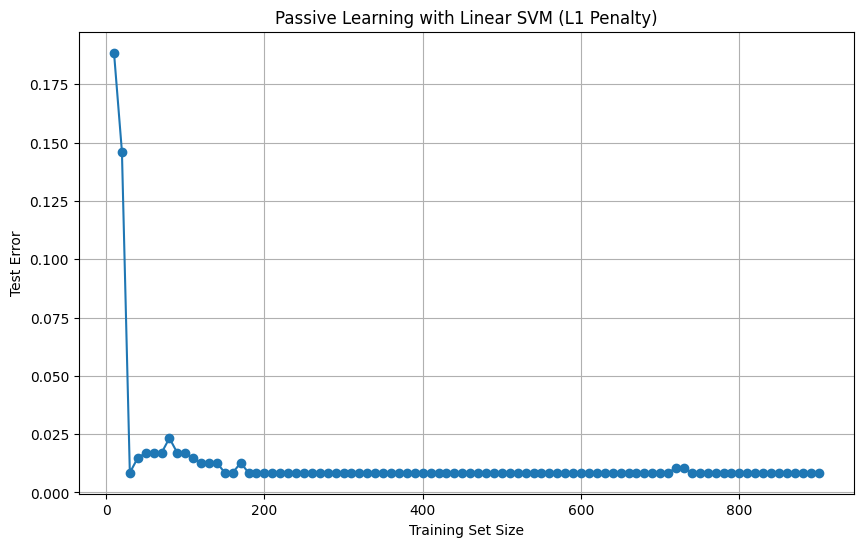

In [41]:
# Here we are plotting the learning curve for our trainig set size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_errs, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Test Error')
plt.title('Passive Learning with Linear SVM (L1 Penalty)')
plt.grid(True)
plt.show()

In [42]:
# Here we are performing the Monte-Carlo Simulation with 50 iterations, and getting the test errors.
test_50_errs_p = []
for itr in range(1, 51):
    
    # Here setting the random seed value, for repeatable results.
    np.random.seed(itr)

    # Here we are getting all the indices of the samples, and initalizing the available and selected sets.
    all_idxs = np.arange(len(X_train))
    avail_idxs = set(all_idxs)
    select_idxs = set()

    # Here we are initalizing a list to store the test errors and also the training sample sizes.
    test_errs = []
    train_sizes = range(10, 901, 10)


    for _ in train_sizes:

        # Here we are setting a bool to check if the 10 random samples we selected are valid.
        valid = False

        while not valid:
            # Here we are selecting a batch of 10 samples randomly
            cand_idxs = np.random.choice(
                list(avail_idxs), size=10, replace=False
            )

            # Here we are checking if the class balance in the current pool of samples is valid
            curr_y_pool = y_train[list(select_idxs) + list(cand_idxs)]
            cls_cnts = np.bincount(curr_y_pool, minlength=2)

            # Here we are checking if there are atleast 5 sample from each class, to enable 5-fold cross validation.
            if np.all(cls_cnts >= 5): 
                valid = True

        # Here we are updating the selected and available indices in the sets.
        select_idxs.update(cand_idxs)
        avail_idxs.difference_update(cand_idxs)

        # Here we are getting our current pool of training set.
        select_idxs_sort = sorted(select_idxs)
        X_pool = X_train.iloc[select_idxs_sort]
        y_pool = y_train.iloc[select_idxs_sort]
        
        # Here is our Linear SVM model with L-1 penalty.
        linear_clf = LinearSVC(penalty='l1', max_iter=100000, random_state=itr)
        
        # Here we are choosing the best C value using 5-fold cross validation.
        param_grid = {'C': np.logspace(-3, 1, 10)}
        clf = GridSearchCV(linear_clf, param_grid, cv=5, scoring='accuracy')
        clf.fit(X_pool, y_pool)
        best_model = clf.best_estimator_
        
        # Here we are getting the test set predictions and calculating the test error.
        y_pred = best_model.predict(X_test)
        err = 1 - accuracy_score(y_test, y_pred)
        test_errs.append(err)
    
    test_50_errs_p.append(test_errs)


#### (ii) Active

In [43]:
# Here setting the random seed value, for repeatable results.
np.random.seed(30)

# Here we are getting all the indices of the samples, and initalizing the available and selected sets.
all_idxs = np.arange(len(X_train))
avail_idxs = set(all_idxs)
select_idxs = set()

# Here we are initalizing a list to store the test errors and also the training sample sizes.
test_errs = []
train_sizes = range(10, 901, 10)

# Here we are setting a bool to check if the 10 random samples we selected are valid.
valid = False

while not valid:
    # Here we are selecting a batch of 10 samples randomly
    cand_idxs = np.random.choice(
        list(avail_idxs), size=10, replace=False
    )

    # Here we are checking if the class balance in the current pool of samples is valid
    curr_y_pool = y_train[list(select_idxs) + list(cand_idxs)]
    cls_cnts = np.bincount(curr_y_pool, minlength=2)

    # Here we are checking if there are atleast 5 sample from each class, to enable 5-fold cross validation.
    if np.all(cls_cnts >= 5): 
        valid = True

# Here we are updating the selected and available indices in the sets.
select_idxs.update(cand_idxs)
avail_idxs.difference_update(cand_idxs)

for _ in train_sizes:
    # Here we are getting our current pool of training set.
    select_idxs_sort = sorted(select_idxs)
    X_pool = X_train.iloc[select_idxs_sort]
    y_pool = y_train.iloc[select_idxs_sort]
    
    # Here is our Linear SVM model with L-1 penalty.
    linear_clf = LinearSVC(penalty='l1', max_iter=100000, random_state=30)
    
    # Here we are choosing the best C value using 5-fold cross validation.
    param_grid = {'C': np.logspace(-3, 1, 10)}
    clf = GridSearchCV(linear_clf, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_pool, y_pool)
    best_model = clf.best_estimator_
    
    # Here we are getting the test set predictions and calculating the test error.
    y_pred = best_model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    test_errs.append(err)

    # Here we are getting the raw scores (Distance from the decision boundary) for each train and test samples.
    dists = np.abs(best_model.decision_function(X_train))
    
    # Here we are selecting the sample which are present in our available set.
    avail_dists = [(i, dists[i]) for i in avail_idxs]
    
    # Here we are sorting by distance and getting the 10 closest samples that are not in the selected pool
    near_idxs = sorted(avail_dists, key=lambda x: x[1])[:10]
    
    # Here we are updating the selected and available indices in the sets.
    select_idxs.update([i for i, _ in near_idxs])
    avail_idxs.difference_update([i for i, _ in near_idxs])


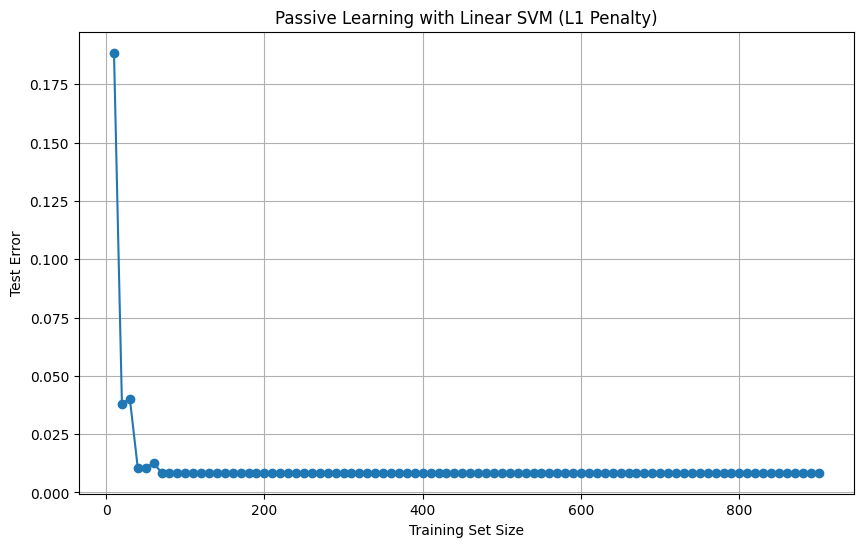

In [44]:
# Here we are plotting the learning curve for our trainig set size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_errs, marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Test Error')
plt.title('Passive Learning with Linear SVM (L1 Penalty)')
plt.grid(True)
plt.show()

In [45]:
# Here we are performing the Monte-Carlo Simulation with 50 iterations, and getting the test errors.
test_50_errs_a = []
for itr in range(1, 51):
    
    # Here setting the random seed value, for repeatable results.
    np.random.seed(itr)

    # Here we are getting all the indices of the samples, and initalizing the available and selected sets.
    all_idxs = np.arange(len(X_train))
    avail_idxs = set(all_idxs)
    select_idxs = set()

    # Here we are initalizing a list to store the test errors and also the training sample sizes.
    test_errs = []
    train_sizes = range(10, 901, 10)

    # Here we are setting a bool to check if the 10 random samples we selected are valid.
    valid = False

    while not valid:
        # Here we are selecting a batch of 10 samples randomly
        cand_idxs = np.random.choice(
            list(avail_idxs), size=10, replace=False
        )

        # Here we are checking if the class balance in the current pool of samples is valid
        curr_y_pool = y_train[list(select_idxs) + list(cand_idxs)]
        cls_cnts = np.bincount(curr_y_pool, minlength=2)

        # Here we are checking if there are atleast 5 sample from each class, to enable 5-fold cross validation.
        if np.all(cls_cnts >= 5): 
            valid = True

    # Here we are updating the selected and available indices in the sets.
    select_idxs.update(cand_idxs)
    avail_idxs.difference_update(cand_idxs)

    for _ in train_sizes:
        # Here we are getting our current pool of training set.
        select_idxs_sort = sorted(select_idxs)
        X_pool = X_train.iloc[select_idxs_sort]
        y_pool = y_train.iloc[select_idxs_sort]
        
        # Here is our Linear SVM model with L-1 penalty.
        linear_clf = LinearSVC(penalty='l1', max_iter=100000, random_state=itr)
        
        # Here we are choosing the best C value using 5-fold cross validation.
        param_grid = {'C': np.logspace(-3, 1, 10)}
        clf = GridSearchCV(linear_clf, param_grid, cv=5, scoring='accuracy')
        clf.fit(X_pool, y_pool)
        best_model = clf.best_estimator_
        
        # Here we are getting the test set predictions and calculating the test error.
        y_pred = best_model.predict(X_test)
        err = 1 - accuracy_score(y_test, y_pred)
        test_errs.append(err)

        # Here we are getting the raw scores (Distance from the decision boundary) for each train and test samples.
        dists = np.abs(best_model.decision_function(X_train))
        
        # Here we are selecting the sample which are present in our available set.
        avail_dists = [(i, dists[i]) for i in avail_idxs]
        
        # Here we are sorting by distance and getting the 10 closest samples that are not in the selected pool
        near_idxs = sorted(avail_dists, key=lambda x: x[1])[:10]
        
        # Here we are updating the selected and available indices in the sets.
        select_idxs.update([i for i, _ in near_idxs])
        avail_idxs.difference_update([i for i, _ in near_idxs])

    test_50_errs_a.append(test_errs)

### (c) Average the 50 test errors

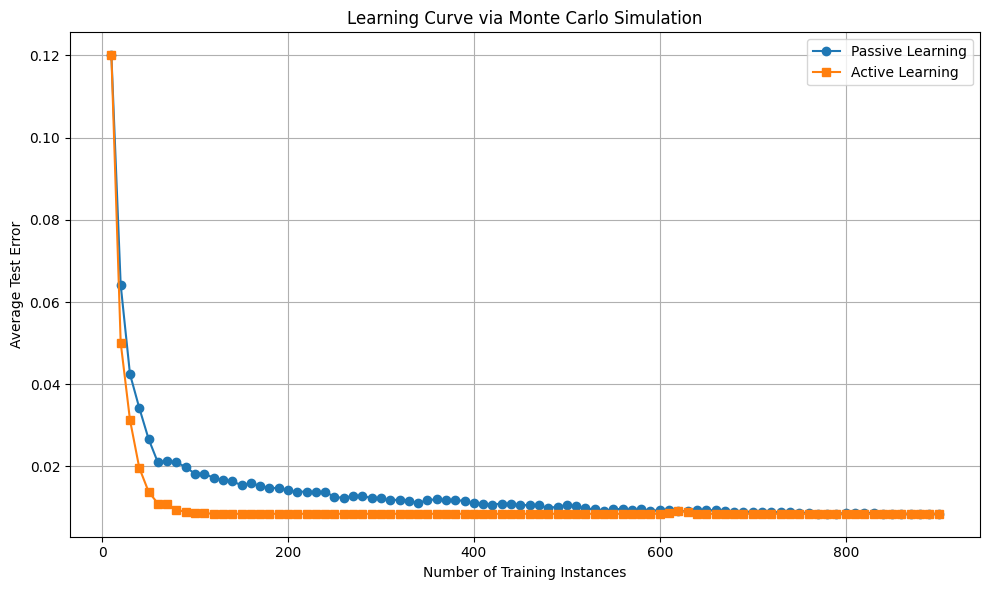

In [46]:
# Here we are plotting the learning curve for our trainig set size, for mean test errors obtained in passive and active learning.
mean_errors_passive = np.mean(test_50_errs_p, axis=0)
mean_errors_active = np.mean(test_50_errs_a, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, mean_errors_passive, label='Passive Learning', marker='o')
plt.plot(train_sizes, mean_errors_active, label='Active Learning', marker='s')
plt.xlabel("Number of Training Instances")
plt.ylabel("Average Test Error")
plt.title("Learning Curve via Monte Carlo Simulation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()